Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(X)
print("Design matrix:")
print(design_matrix)

Design matrix:
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
design_matrix_t = np.transpose(design_matrix)
w1 = np.dot(np.matmul(linalg.inv(np.matmul(design_matrix_t, design_matrix)), design_matrix_t), y)
print("Weights:")
print(w1)

w2 = np.dot(linalg.pinv(design_matrix), y)
print("Weights using pinv:")
print(w2)
# Vaš kôd ovdje

Weights:
[2.2        0.45714286]
Weights using pinv:
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

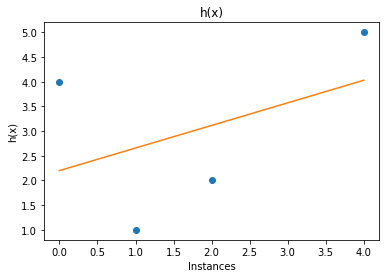

E(h|D):
4.085714285714285
Mean squared error:
2.0428571428571427


In [5]:
from sklearn.metrics import mean_squared_error as mse
# Vaš kôd ovdje
def h(x):
    return np.dot(np.transpose(w1), np.transpose(x))

plt.plot(X,y,'o')
plt.plot(X,h(design_matrix))
plt.xlabel("Instances")
plt.ylabel("h(x)")
plt.title('h(x)')
plt.show()
print("E(h|D):")
print(1/2*(sum((y-h(design_matrix))**2)))
print("Mean squared error:")
print(mse(y,h(design_matrix)))

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
#matrica nije kvadratna pa nema inverz
print("Design matrix dimensions:")
print(design_matrix.shape)
#print("Design matrix rank:")
#print(linalg.matrix_rank(design_matrix))
try:    
    design_matrix_inv = linalg.inv(design_matrix)
    w = np.dot((design_matrix_inv, y))
except LinAlgError:
    print("Matrix is not squared.")

Design matrix dimensions:
(4, 2)
Matrix is not squared.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

Regression coefficient:
[0.45714286]
Regression intercept:
2.2


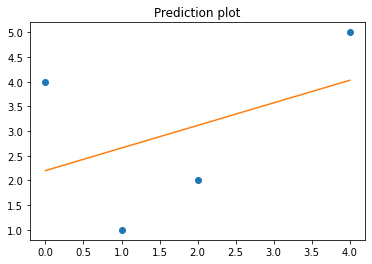

E(h|D):
4.085714285714286
Mean squared error:
2.042857142857143


In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

#weights
reg = LinearRegression().fit(X,y)
print("Regression coefficient:")
print(reg.coef_)
print("Regression intercept:")
print(reg.intercept_)

#prediction
pred = reg.predict(X)
plt.title('Prediction plot')
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

#errors
print("E(h|D):")
print(1/2*(sum((y-pred)**2)))
print("Mean squared error:")
print(mse(y,pred))

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return f(X) + normal(0, noise, X.shape)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x*x -5*x*x*x

instances = make_instances(-5,5,50)
labels = make_labels(instances, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

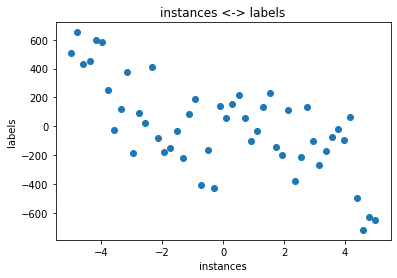

In [11]:
# Vaš kôd ovdje
plt.scatter(instances, labels)
plt.title('instances <-> labels')
plt.xlabel("instances")
plt.ylabel("labels")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

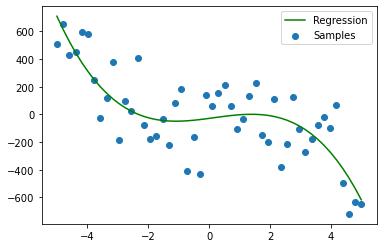

Mean squared error:
36057.695175801266


In [12]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
design_matrix = poly.fit_transform(instances)
regression = LinearRegression().fit(design_matrix,labels)
y_pred = regression.predict(design_matrix)

#design_matrix_pseudo = linalg.pinv(design_matrix)
#w = design_matrix_pseudo.dot(labels)
#y_pred = design_matrix.dot(w)

plt.plot(instances,y_pred,label="Regression", color = "green")
plt.scatter(instances, labels, label="Samples")
plt.legend()
plt.show()

print("Mean squared error:")
print(mse(labels, y_pred))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Mean squared error for regression with degree of polynomial equal to 1:
53536.01691569491
Mean squared error for regression with degree of polynomial equal to 3:
36057.695175801266
Mean squared error for regression with degree of polynomial equal to 5:
35286.2064725855
Mean squared error for regression with degree of polynomial equal to 10:
28314.358256052863
Mean squared error for regression with degree of polynomial equal to 20:
23228.553136573424


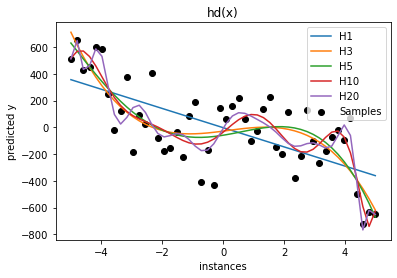

In [13]:
# Vaš kôd ovdje
degrees = [1,3,5,10,20]
plt.scatter(instances, labels, label="Samples", color = "black");
for degree in degrees:
    poly = PolynomialFeatures(degree)
    design_matrix = poly.fit_transform(instances)
    regression = LinearRegression().fit(design_matrix,labels)
    y_pred = regression.predict(design_matrix)
    plt.plot(instances,y_pred,label="H" + str(degree))
    print("Mean squared error for regression with degree of polynomial equal to " + str(degree) + ":")
    print(mse(labels, y_pred))

plt.xlabel("instances")
plt.ylabel("predicted y")
plt.legend()
plt.title('hd(x)')
plt.show()
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

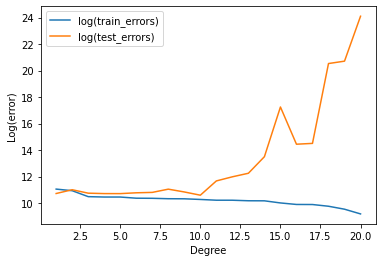

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)
degrees = range(1,21)
train_errors = []
test_errors = []
for degree in degrees:
    poly = PolynomialFeatures(degree)
    design_matrix_train = poly.fit_transform(X_train)
    design_matrix_test = poly.fit_transform(X_test)
    regression = LinearRegression().fit(design_matrix_train,y_train)
    y_pred_train = regression.predict(design_matrix_train)
    y_pred_test = regression.predict(design_matrix_test)
    train_errors.append(mse(y_train, y_pred_train))
    test_errors.append(mse(y_test, y_pred_test))
    
plt.plot(degrees, np.log(train_errors), '-', label="log(train_errors)")
plt.plot(degrees, np.log(test_errors), '-', label="log(test_errors)")
plt.xlabel("Degree")
plt.ylabel("Log(error)")
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

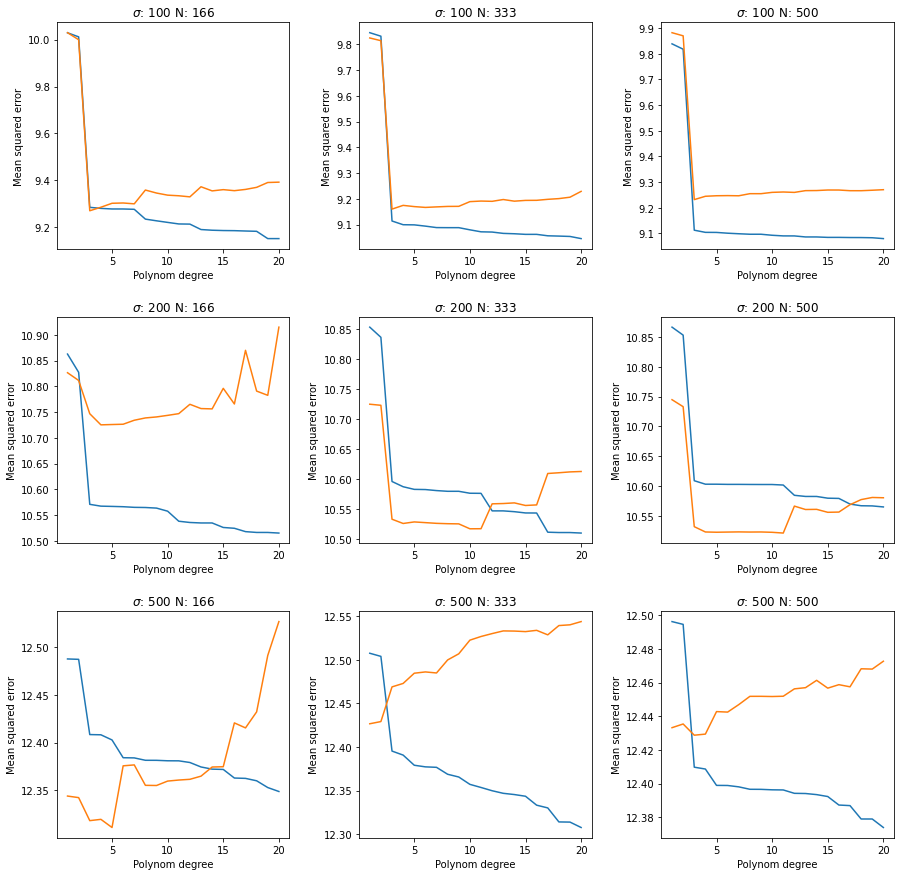

In [15]:
# Vaš kôd ovdje
noises = [100,200,500]
Ns = [1/3,2/3,1]
instances = make_instances(-5,5,1000)
fig, axarr = plt.subplots(3,3, figsize = (15,15))

for i, noise in enumerate(noises):
    labels = make_labels(instances, f, noise = noise)
    X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)
    size = len(X_train)
    for j, n in enumerate(Ns):
        size_n = int(n*size)
        rand = np.random.choice(size, size_n, replace=False)
        X_train1 = X_train[rand]
        X_test1 = X_test[rand]
        y_train1 = y_train[rand]
        y_test1 = y_test[rand]
        
        train_errors = []
        test_errors = []
        for degree in degrees:
            poly= PolynomialFeatures(degree)
            design_matrix_train = poly.fit_transform(X_train1)
            design_matrix_test = poly.fit_transform(X_test1)
            regression = LinearRegression().fit(design_matrix_train, y_train1)
            y_pred_train = regression.predict(design_matrix_train)
            y_pred_test = regression.predict(design_matrix_test)
            train_errors.append(mse(y_train1, y_pred_train))
            test_errors.append(mse(y_test1, y_pred_test))
            
        axarr[i,j].plot(degrees,log(train_errors), label="Train error")
        axarr[i,j].plot(degrees,log(test_errors), label="Test error")
        axarr[i,j].set_title("$\sigma$: " + str(noise) + " N: " + str(size_n))
        axarr[i, j].set_xlabel("Polynom degree")
        axarr[i, j].set_ylabel("Mean squared error")
        
fig.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
design_matrix = poly.fit_transform(X)
n = design_matrix.shape[1]
for l in [0,1,10]:
    weights = np.dot(np.matmul(linalg.inv(np.matmul(design_matrix.T, design_matrix) + l * identity(n)), design_matrix.T), y)
    print("Lambda = " + str(l))
    print(weights)

Lambda = 0
[ 4.         -5.91666667  3.375      -0.45833333]
Lambda = 1
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
Lambda = 10
[0.43312265 0.11060671 0.13827839 0.03093411]


In [17]:
#function for identity matrix creation with 0 at position [0][0]
def identity(n):
    identity_matrix = numpy.identity(n)
    identity_matrix[0][0] = 0
    return identity_matrix

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for lambdaa in [0,1,10]:
    clf = Ridge(alpha=lambdaa)
    clf.fit(design_matrix,y)
    print("Lambda = " + str(lambdaa))
    print(np.hstack([clf.intercept_,clf.coef_[1:]]))

Lambda = 0
[ 4.         -5.91666667  3.375      -0.45833333]
Lambda = 1
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Lambda = 10
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

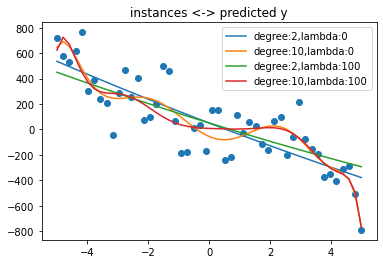

In [19]:
# Vaš kôd ovdje
instances = make_instances(-5,5,50)
labels = make_labels(instances, f, 200)
#print(instances.shape)
plt.scatter(instances, labels)
for lambdaa in [0,100]:
    for degree in [2,10]:
        poly = PolynomialFeatures(degree)
        design_matrix = poly.fit_transform(instances)
        clf = Ridge(alpha = lambdaa).fit(design_matrix, labels)
        pred_y = clf.predict(design_matrix)
        plt.plot(instances, pred_y, '-', label="degree:" + str(degree) + "," + "lambda:" + str(lambdaa))
        
plt.legend()
plt.title('instances <-> predicted y')
plt.show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


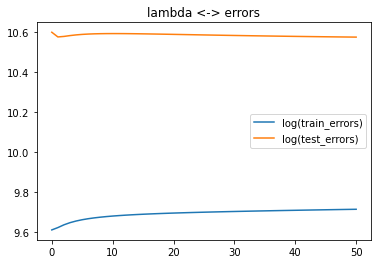

In [20]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)
degree = 10
lambdas = range(0, 51)
train_errors = []
test_errors = []
poly = PolynomialFeatures(degree)
design_matrix_train = poly.fit_transform(X_train)
design_matrix_test = poly.fit_transform(X_test)
for lambdaa in lambdas:
    clf = Ridge(alpha = lambdaa).fit(design_matrix_train, y_train)
    y_pred_train = clf.predict(design_matrix_train)
    y_pred_test = clf.predict(design_matrix_test)
    train_errors.append(mse(y_train, y_pred_train))
    test_errors.append(mse(y_test, y_pred_test))
plt.plot(lambdas,log(train_errors),label="log(train_errors)")
plt.plot(lambdas,log(test_errors),label="log(test_errors)")
plt.title('lambda <-> errors')
plt.legend()
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

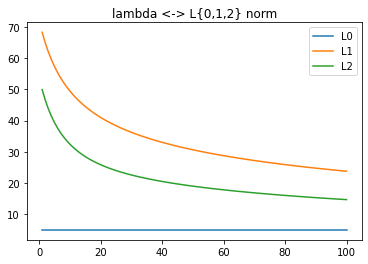

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)
design_matrix = PolynomialFeatures(5).fit_transform(X_train)
lambdas = range(1, 101)
l0 = []
l1 = []
l2 = []
#print(y_train.reshape(-1).shape)
#print(design_matrix.shape)
for lambdaa in lambdas:
    ridge = Ridge(alpha=lambdaa).fit(design_matrix, y_train.reshape(-1))
    l0.append(nonzeroes(ridge.coef_))
    l1.append(numpy.linalg.norm((ridge.coef_), ord=1))
    l2.append(numpy.linalg.norm((ridge.coef_), ord=2))
plt.plot(lambdas, l0, label="L0")
plt.plot(lambdas, l1, label="L1")
plt.plot(lambdas, l2, label="L2")
plt.title('lambda <-> L{0,1,2} norm')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

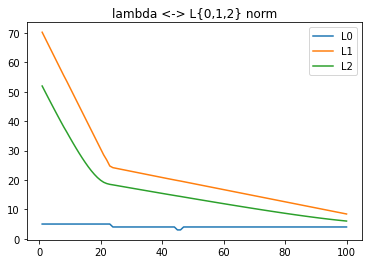

In [23]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)
design_matrix = PolynomialFeatures(5).fit_transform(X_train)
lambdas = range(1, 101)
l0 = []
l1 = []
l2 = []
#print(y_train.reshape(-1).shape)
#print(design_matrix.shape)
for lambdaa in lambdas:
    lasso = Lasso(alpha=lambdaa).fit(design_matrix, y_train.reshape(-1))
    l0.append(nonzeroes(lasso.coef_))
    l1.append(numpy.linalg.norm((lasso.coef_), ord=1))
    l2.append(numpy.linalg.norm((lasso.coef_), ord=2))
plt.plot(lambdas, l0, label="L0")
plt.plot(lambdas, l1, label="L1")
plt.plot(lambdas, l2, label="L2")
plt.title('lambda <-> L{0,1,2} norm')
plt.legend()
plt.show()
#print(l0)

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

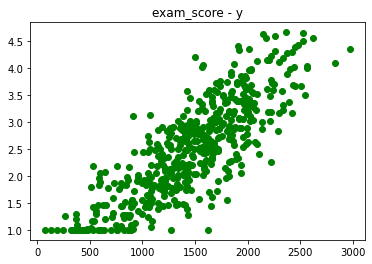

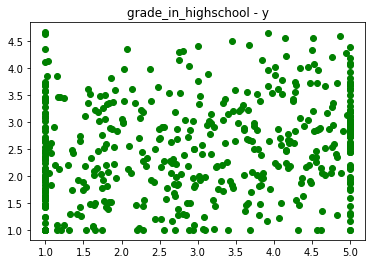

In [25]:
# Vaš kôd ovdje
plt.scatter(exam_score,grades_y, color = 'green')
plt.title("exam_score - y")
plt.show()
plt.scatter(grade_in_highschool,grades_y, color = 'green')
plt.title("grade_in_highschool - y")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

weights:
[0.00141497 0.09477276]


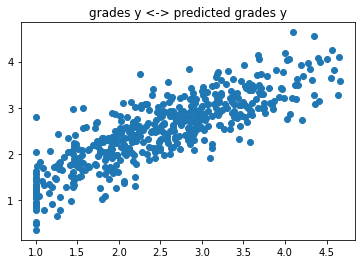

In [26]:
# Vaš kôd ovdje
clf_grades = Ridge(alpha=0.01).fit(grades_X,grades_y)
grades_y_pred = clf_grades.predict(grades_X)
print("weights:")
print(clf_grades.coef_)
plt.scatter(grades_y,grades_y_pred)
plt.title("grades y <-> predicted grades y")
plt.show()

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

weights:
[0.81630375 0.15167761]


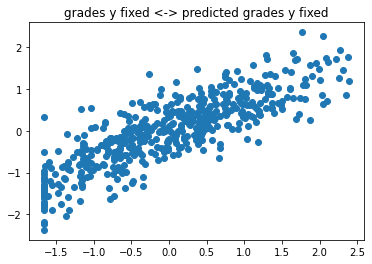

In [27]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
standard_scaler = StandardScaler()
grades_X_fixed = standard_scaler.fit_transform(grades_X)
#print(grades_X)
#reshape row to column
grades_y_fixed = standard_scaler.fit_transform(grades_y.reshape(-1,1))
#print(grades_y.reshape(-1,1))


clf_grades_fixed = Ridge(alpha=0.01).fit(grades_X_fixed,grades_y_fixed)
grades_y_fixed_pred = clf_grades_fixed.predict(grades_X_fixed)
#print(grades_y_fixed_pred)
print("weights:")
#print(clf_grades_fixed.intercept_)
print(clf_grades_fixed.coef_[0])
plt.scatter(grades_y_fixed,grades_y_fixed_pred)
plt.title("grades y fixed <-> predicted grades y fixed")
plt.show()

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [28]:
# Vaš kôd ovdje
highschool_grade = grades_X_fixed[:, -1]
#print(highschool_grade.shape)
#print(grades_X_fixed.shape)
#add columnt highscool grade
grades_X_fixed_colinear = np.c_[grades_X_fixed, highschool_grade]
grades_X_fixed_colinear
#grades_X_fixed_colinear = np.hstack([grades_X_fixed, grades_X_fixed[:,-1:]])

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

weights:
[0.81630364 0.07583957 0.07583957]


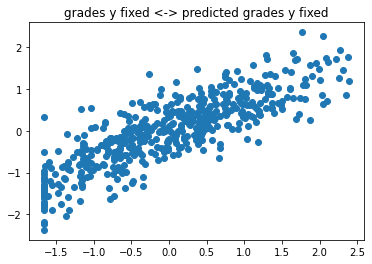

In [29]:
# Vaš kôd ovdje
clf_grades_fixed_colinear = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
#print(clf_grades_fixed_colinear)
grades_y_fixed_colinear_pred = clf_grades_fixed_colinear.predict(grades_X_fixed_colinear)
#print(grades_y_fixed_colinear_pred)
print("weights:")
print(clf_grades_fixed_colinear.coef_[0])
plt.scatter(grades_y_fixed, grades_y_fixed_colinear_pred)
plt.title("grades y fixed <-> predicted grades y fixed")
plt.show()

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [30]:
# Vaš kôd ovdje
size = int(len(grades_X_fixed_colinear))
half_size = int(size*0.5)
#print(size)
weights1 = []
weights2 = []

for i in range(10):
    rand = np.random.choice(size, size=half_size, replace=False)
    grades_X_fixed_colinear_05 = grades_X_fixed_colinear[rand]
    grades_y_fixed_05 = grades_y_fixed[rand]
    ridge1 = Ridge(0.01).fit(grades_X_fixed_colinear_05, grades_y_fixed_05)
    weights1.append(ridge1.coef_)
    ridge2 = Ridge(1000).fit(grades_X_fixed_colinear_05, grades_y_fixed_05)
    weights2.append(ridge2.coef_)

counter = 1
print("Weights with lambda value 0.01:")
for weight in weights1:
    print("Sample " + str(counter))
    print(weight[0])
    counter = counter + 1
    
print()
counter = 1
print("Weights with lambda value 1000:")
for weight in weights2:
    print("Sample " + str(counter))
    print(weight[0])
    counter = counter + 1
    
print()
print("Standard deviations for lambda value 0.01:")
print(np.std(weights1, axis=0)[0])
print("Standard deviations for lambda value 1000:")
print(np.std(weights2, axis=0)[0])

Weights with lambda value 0.01:
Sample 1
[0.84344967 0.08902444 0.08902444]
Sample 2
[0.82496436 0.0743091  0.0743091 ]
Sample 3
[0.81998306 0.07417031 0.07417031]
Sample 4
[0.79865227 0.07669605 0.07669605]
Sample 5
[0.83814641 0.06956705 0.06956705]
Sample 6
[0.82458024 0.10887909 0.10887909]
Sample 7
[0.82753018 0.08767275 0.08767275]
Sample 8
[0.81999026 0.0856458  0.0856458 ]
Sample 9
[0.810926  0.1092402 0.1092402]
Sample 10
[0.81087976 0.0769835  0.0769835 ]

Weights with lambda value 1000:
Sample 1
[0.16419725 0.02816756 0.02816756]
Sample 2
[0.16837778 0.04200572 0.04200572]
Sample 3
[0.16675609 0.03992155 0.03992155]
Sample 4
[0.16232085 0.03253696 0.03253696]
Sample 5
[0.17099764 0.03987356 0.03987356]
Sample 6
[0.15003014 0.03454006 0.03454006]
Sample 7
[0.17269709 0.04318487 0.04318487]
Sample 8
[0.1670921 0.0357689 0.0357689]
Sample 9
[0.16044761 0.05071806 0.05071806]
Sample 10
[0.16131422 0.03525785 0.03525785]

Standard deviations for lambda value 0.01:
[0.01251503 0.0


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.